## Gregoire-Stein Dataset Analysis
This is a notebook to analyze some data published from the Gregoire JCAP group. The paper detailing their analysis techniques using a GAN can be found here: https://pubs.rsc.org/ja/content/articlehtml/2019/sc/c8sc03077d

In [1]:
import h5py    
import numpy as np    
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.metrics import silhouette_score
from sklearn.cluster import MeanShift
%matplotlib inline


The data for this can be downloaded at:  https://data.caltech.edu/records/1103

In [2]:
data = h5py.File('dataset_comp_image_spectra.h5','r+')

In [3]:
# List all groups
print("Keys: %s" % data.keys())
a_group_key = list(data.keys())[0]

# Get the data
data_keys = list(data[a_group_key])

Keys: KeysView(<HDF5 file "dataset_comp_image_spectra.h5" (mode r+)>)


Check out the fractions dataframe, keys are the elements (see below)

In [4]:
atfrac = pd.DataFrame(data['atfrac'].value)
atfrac

,0,1,2,3,4,5,6,7,8,9,...,180892,180893,180894,180895,180896,180897,180898,180899,180900,180901
0,0.0,0.00,0.05,0.0,0.05,0.1,0.00,0.05,0.10,0.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.95,0.95,0.9,0.90,0.9,0.85,0.85,0.85,0.85,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
9,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
at_frac_keys = data['atfrac_keys'].value

In [6]:
print(at_frac_keys)
elts_frac_keys = [str(i)[2:str(i).index('.')] for i in at_frac_keys]

[b'Fe.PM.AtFr' b'Sn.PM.AtFr' b'Ti.PM.AtFr' b'Zn.PM.AtFr' b'Ce.PM.AtFr'
 b'Co.PM.AtFr' b'Ni.PM.AtFr' b'Bi.PM.AtFr' b'V.PM.AtFra' b'Cu.PM.AtFr'
 b'Mn.PM.AtFr' b'W.PM.AtFra' b'Mo.PM.AtFr' b'La.PM.AtFr' b'Cr.PM.AtFr'
 b'Y.PM.AtFra' b'Er.PM.AtFr' b'Sr.PM.AtFr' b'Gd.PM.AtFr' b'Sm.PM.AtFr'
 b'Sb.PM.AtFr' b'Nb.PM.AtFr' b'Ga.PM.AtFr' b'In.PM.AtFr' b'Al.PM.AtFr'
 b'Pb.PM.AtFr' b'Mg.PM.AtFr' b'Ca.PM.AtFr' b'Pr.PM.AtFr' b'Eu.PM.AtFr'
 b'Zr.PM.AtFr' b'Lu.PM.AtFr' b'Ba.PM.AtFr' b'Yb.PM.AtFr' b'P.PM.AtFra'
 b'Sc.PM.AtFr' b'Ag.PM.AtFr' b'Tb.PM.AtFr' b'Nd.PM.AtFr' b'Pd.PM.AtFr'
 b'Hf.PM.AtFr' b'Rb.PM.AtFr']


In [7]:
spectra = data['spectra'].value
energy_eV = data['energy_eV'].value

Pipe in all our images (takes about a minute to run)

In [8]:
images = data['images'].value

The main function, our current workhorse.

In [9]:
def cluster_picture(ind,show=True,verbose=True,num_clusters=None):
    '''
    Args:
        ind: Int. The index in the list images (defined above)
        show: Bool. Do you want to see the picture at the end?
        verbose: Bool. Do you want to know the composition?
        num_clusters: None or Int. If None, then KMeans will take
            the best number of clusters between 3 and 8, which is
            decided based on a silhouetting metric. If int, the
            KMeans will simply perform the calculation as specified.
    Returns:
        Number of clusters
        Silhouetting Score for this number of clusters
    '''
    elts_present = atfrac[ind].tolist()
    if verbose:
        for i in range(len(elts_present)):
            if elts_present[i]!=0:
                print(elts_frac_keys[i]+' '+str(elts_present[i]))
    
    hsv = np.uint8(np.array(images[ind])*255)
    edges = cv2.Canny(hsv,1,100)

    value = np.sqrt(((images[ind].shape[0]/2.0)**2.0)+\
                    ((images[ind].shape[1]/2.0)**2.0))
    polar_image = cv2.linearPolar(images[ind], (images[ind].shape[0]/2, images[ind].shape[1]/2), \
                                  value, cv2.WARP_FILL_OUTLIERS)
    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    Z = (polar_image[:,:44]*255.).reshape((-1,3))
    s_score_li = []
    Z = np.float32(Z)
    if num_clusters==None:
        for K in range(3,8):
            ret,label,center=cv2.kmeans(Z,K,None,criteria,\
                                        10,cv2.KMEANS_RANDOM_CENTERS)
            sil = silhouette_score(Z,label.flatten())
            s_score_li.append(sil)
    #        plt.figure()
    #        plt.imshow(label.reshape((64,44)),cmap='viridis')
    #        plt.show()
        K_final = int(s_score_li.index(max(s_score_li))+3)
    else:
        K_final=int(num_clusters)
    ret,label,center=cv2.kmeans(Z,K_final,None,criteria,\
                                10,cv2.KMEANS_RANDOM_CENTERS)
    sil_final = silhouette_score(Z,label.flatten())
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((64,44,3))

    if show:
        f, axarr = plt.subplots(2, 2)
        #Original Image
        axarr[0,0].set_title('Original Image')
        axarr[0,0].imshow(images[ind])
        #Absorption Spectrum
        axarr[0,1].set_title('Absorption Spectrum')
        axarr[0,1].plot(energy_eV,spectra[ind])
        #Canny Edge Image
        axarr[1,0].set_title('Canny Edge Image')
        axarr[1,0].imshow(edges,cmap='gray')
        #Polar Coordinate
        axarr[1,1].set_title('Polar '+str(K_final)+' Clustering')
        axarr[1,1].imshow(res2)
        for ax in axarr.flat:
            ax.label_outer()
        plt.show()
    return K_final,sil_final
    

Testing 1 2 3...

Bi 1.0


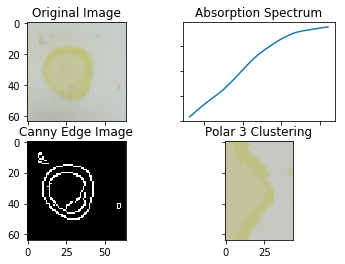

In [10]:
K,sil=cluster_picture(0)

What about samples that give more than three clusters (i.e. more than one coffee ring)? What's different about these samples, and is the second coffee ring discernible to the untrained eye?

Image 125, Silhouette Score: 0.6183744
Bi 0.25
Mn 0.75


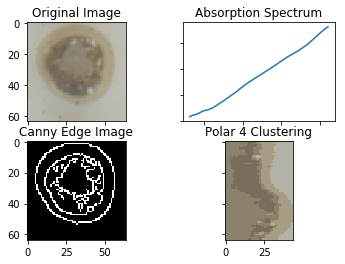

Image 130, Silhouette Score: 0.6426855
Fe 0.25
Bi 0.25
Mn 0.5


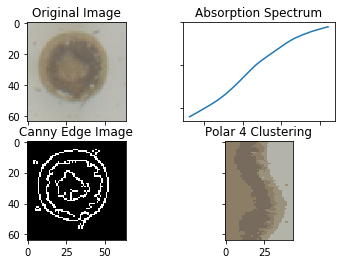

Image 136, Silhouette Score: 0.6785968
Fe 0.5
Bi 0.25
Mn 0.25


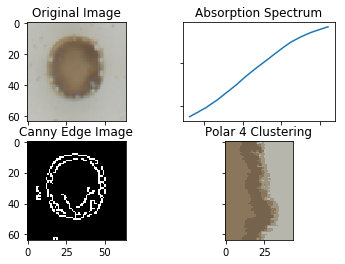

Image 137, Silhouette Score: 0.68953085
Fe 0.550000011920929
Bi 0.25
Mn 0.20000000298023224


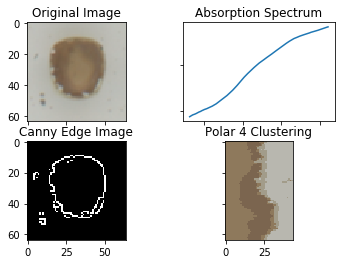

Image 145, Silhouette Score: 0.61387
Fe 0.15000000596046448
Bi 0.20000000298023224
Mn 0.6499999761581421


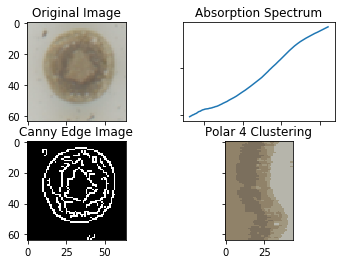

Image 154, Silhouette Score: 0.6257606
Fe 0.550000011920929
Bi 0.20000000298023224
Mn 0.25


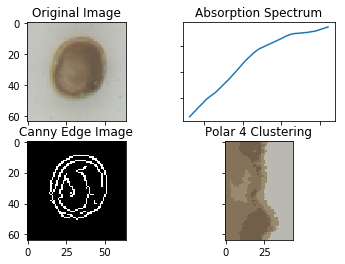

Image 161, Silhouette Score: 0.3748016
Ga 1.0


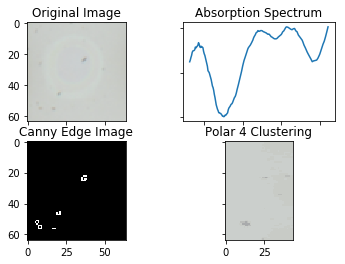

Image 181, Silhouette Score: 0.57499605
Fe 0.10000000149011612
Bi 0.10000000149011612
Mn 0.800000011920929


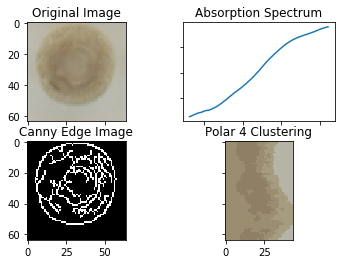

In [11]:
for i in range(100,200):
    K_final,sil = cluster_picture(i,show=False,verbose=False)
    if K_final>3:
        print('Image '+str(i)+', Silhouette Score: '+str(sil))
        cluster_picture(i,num_clusters=K_final)

Side Note: Because KMeans randomly instantiates the locations of the centroids, the number of clusters can sometimes fluctuate. This is presumed to be fairly rare, but will likely require one of two solutions: either the clustering used is changed to run independent of a given number of clusters, or KMeans is repeated by the function for a random centroid instantiation for a few iterations to ensure a consensus about the true number of clusters.